In [4]:
from matplotlib.cbook import contiguous_regions
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
from pandas.core.sorting import get_compressed_ids
from pandas_ods_reader import read_ods
from scipy.optimize import curve_fit
from lab_lib import *

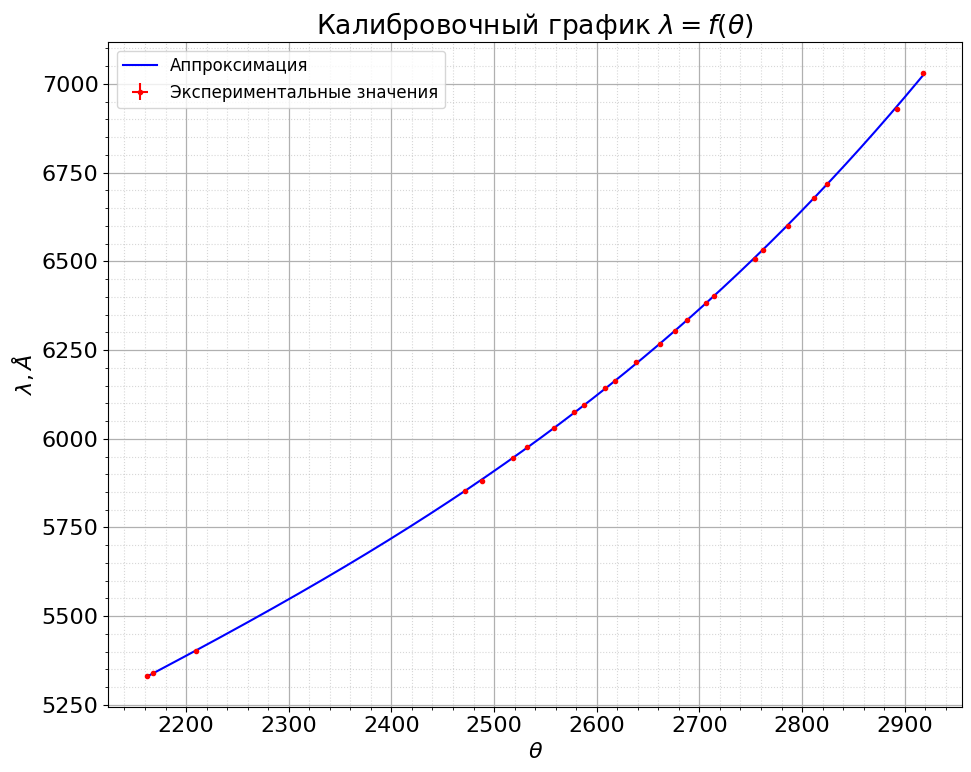

[ 9.56447223e-07 -5.98542879e-03  1.39991853e+01 -6.62446674e+03]


\begin{table}[!ht]
    \centering
    \begin{tabular}{|c|c|}
        \hline

        $\theta$ & $\lambda,\AA$\\ \hline
        $2918 \pm 2$ & 7032\\ \hline
        $2892 \pm 2$ & 6929\\ \hline
        $2824 \pm 2$ & 6717\\ \hline
        $2812 \pm 2$ & 6678\\ \hline
        $2786 \pm 2$ & 6599\\ \hline
        $2762 \pm 2$ & 6533\\ \hline
        $2754 \pm 2$ & 6507\\ \hline
        $2714 \pm 2$ & 6402\\ \hline
        $2706 \pm 2$ & 6383\\ \hline
        $2688 \pm 2$ & 6334\\ \hline
        $2676 \pm 2$ & 6305\\ \hline
        $2662 \pm 2$ & 6267\\ \hline
        $2638 \pm 2$ & 6217\\ \hline
        $2618 \pm 2$ & 6164\\ \hline
        $2608 \pm 2$ & 6143\\ \hline
        $2588 \pm 2$ & 6096\\ \hline
        $2578 \pm 2$ & 6074\\ \hline
        $2558 \pm 2$ & 6030\\ \hline
        $2532 \pm 2$ & 5976\\ \hline
        $2518 \pm 2$ & 5945\\ \hline
        $2488 \pm 2$ & 5882\\ \hline
        $2472 \pm 2$ & 5852\\ \hline

In [5]:
cal_file = read_ods("data/calibration.ods").to_numpy()

lambd = [i[0] for i in cal_file]
theta = [i[1] for i in cal_file]

cal_func, cal_coeffs = make_polyfit("img/calibration.png", r"Калибровочный график $\lambda = f(\theta)$", r"$\theta$", r"$\lambda, \AA$", theta, lambd, [0]*len(lambd), [0]*len(lambd), degree=3)

print(cal_coeffs)

cal_table = [[r"$\theta$", r"$\lambda,\AA$"]]
for i in range(len(lambd)):
    cal_table.append([texAns((theta[i], 2)), str(int(lambd[i]))])

texTable(cal_table)

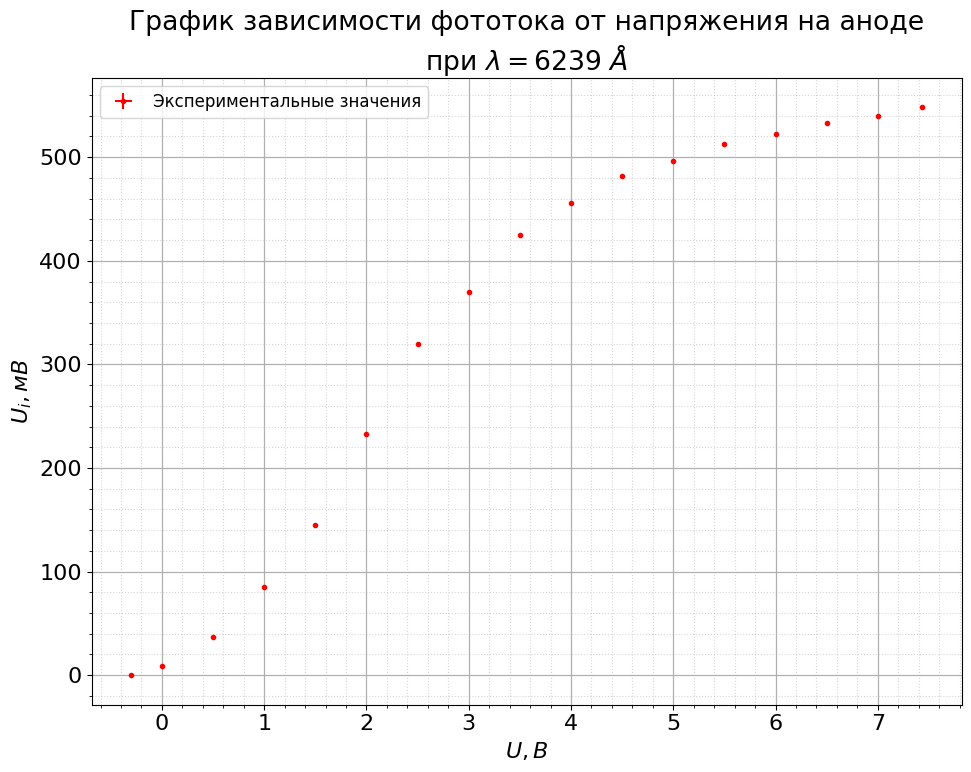

In [6]:
full_file = read_ods("data/rough.ods").to_numpy()

full_U   = [i[0] for i in full_file]
full_U_i = [i[1] for i in full_file]

make_plot_no_mnk("img/full.png", "График зависимости фототока от напряжения на аноде\n" + r"при $\lambda = 6239~\AA$", r"$U, В$", r"$U_i, мВ$", full_U, full_U_i, [0.0001]*len(full_U), [1]*len(full_U_i))

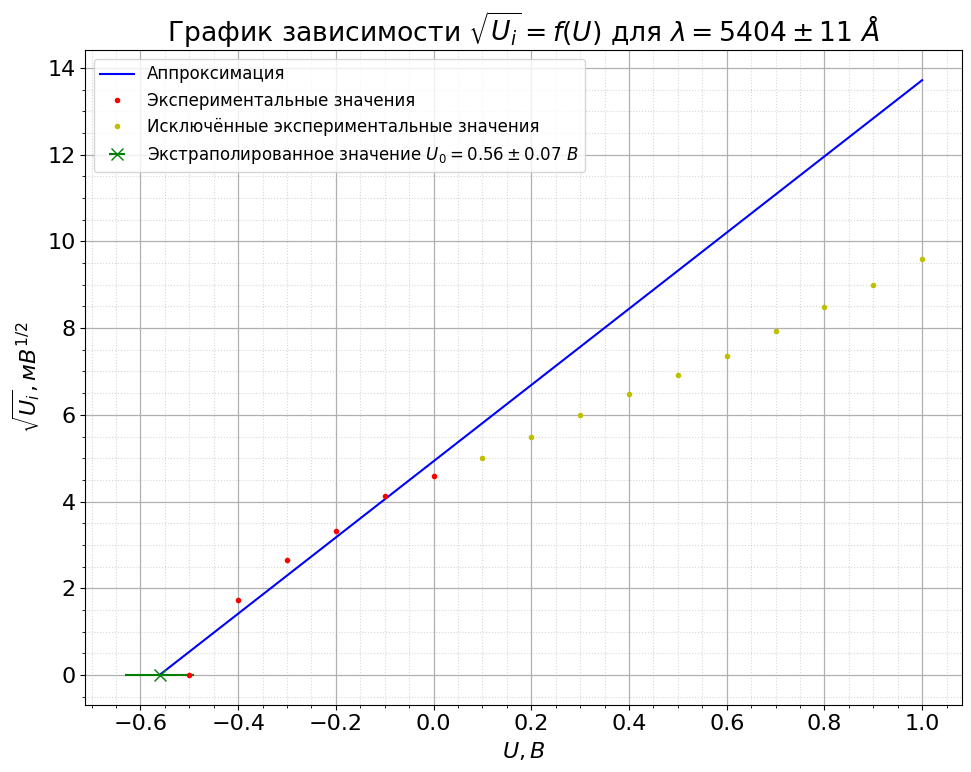



\begin{table}[!ht]
    \centering
    \begin{tabular}{|c|c|c|}
        \hline

        $U, В$ & $U_i, мВ$ & $\sqrt{U_i}, мВ^{1/2}$\\ \hline
        $1.0000$ & $92$ & $9.59 \pm 0.05$\\ \hline
        $0.9000$ & $81$ & $9.00 \pm 0.06$\\ \hline
        $0.8000$ & $72$ & $8.49 \pm 0.06$\\ \hline
        $0.7000$ & $63$ & $7.94 \pm 0.06$\\ \hline
        $0.6000$ & $54$ & $7.35 \pm 0.07$\\ \hline
        $0.5000$ & $48$ & $6.93 \pm 0.07$\\ \hline
        $0.4000$ & $42$ & $6.48 \pm 0.08$\\ \hline
        $0.3000$ & $36$ & $6.00 \pm 0.08$\\ \hline
        $0.2000$ & $30$ & $5.48 \pm 0.09$\\ \hline
        $0.1000$ & $25$ & $5.00 \pm 0.10$\\ \hline
        $0.0000$ & $21$ & $4.58 \pm 0.11$\\ \hline
        $-0.1000$ & $17$ & $4.12 \pm 0.12$\\ \hline
        $-0.2000$ & $11$ & $3.3 \pm 0.2$\\ \hline
        $-0.3000$ & $7$ & $2.6 \pm 0.2$\\ \hline
        $-0.4000$ & $3$ & $1.7 \pm 0.3$\\ \hline
        $-0.5000$ & $0$ & $0.0 \pm 1.0$\\ \hline

    \end{tabular}
    \caption{Таблица измерени

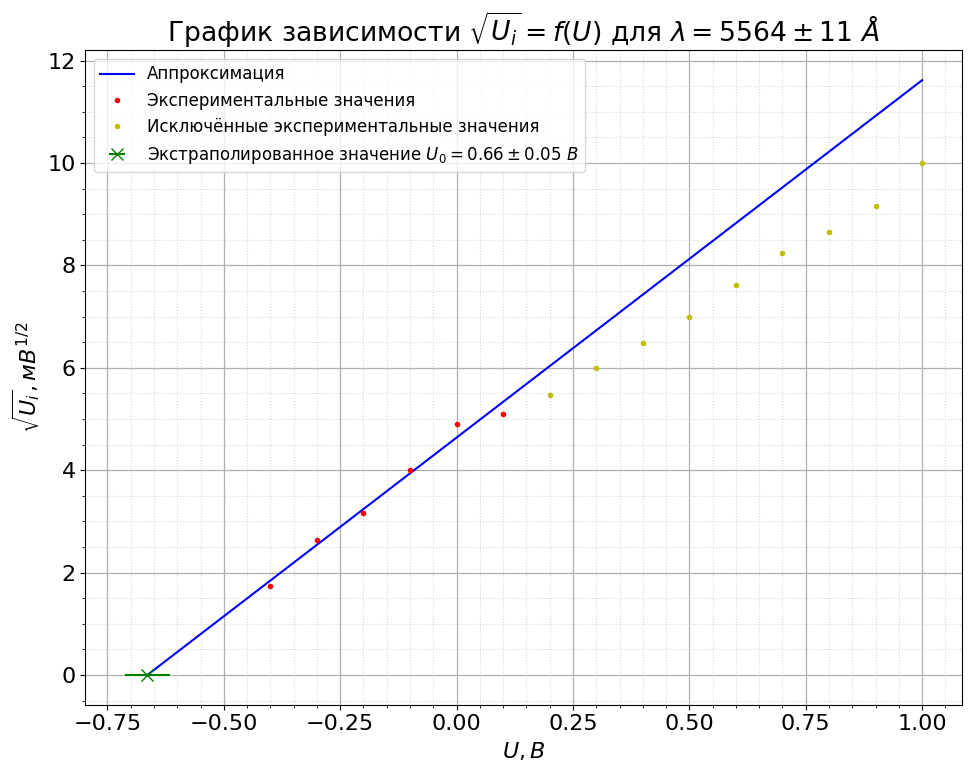



\begin{table}[!ht]
    \centering
    \begin{tabular}{|c|c|c|}
        \hline

        $U, В$ & $U_i, мВ$ & $\sqrt{U_i}, мВ^{1/2}$\\ \hline
        $1.0000$ & $100$ & $10.00 \pm 0.05$\\ \hline
        $0.9000$ & $84$ & $9.17 \pm 0.05$\\ \hline
        $0.8000$ & $75$ & $8.66 \pm 0.06$\\ \hline
        $0.7000$ & $68$ & $8.25 \pm 0.06$\\ \hline
        $0.6000$ & $58$ & $7.62 \pm 0.07$\\ \hline
        $0.5000$ & $49$ & $7.00 \pm 0.07$\\ \hline
        $0.4000$ & $42$ & $6.48 \pm 0.08$\\ \hline
        $0.3000$ & $36$ & $6.00 \pm 0.08$\\ \hline
        $0.2000$ & $30$ & $5.48 \pm 0.09$\\ \hline
        $0.1000$ & $26$ & $5.099 \pm 0.098$\\ \hline
        $0.0000$ & $24$ & $4.90 \pm 0.10$\\ \hline
        $-0.1000$ & $16$ & $4.00 \pm 0.12$\\ \hline
        $-0.2000$ & $10$ & $3.2 \pm 0.2$\\ \hline
        $-0.3000$ & $7$ & $2.6 \pm 0.2$\\ \hline
        $-0.4000$ & $3$ & $1.7 \pm 0.3$\\ \hline

    \end{tabular}
    \caption{Таблица измерений для $\lambda = $$5564 \pm 11$ \AA}
    \lab

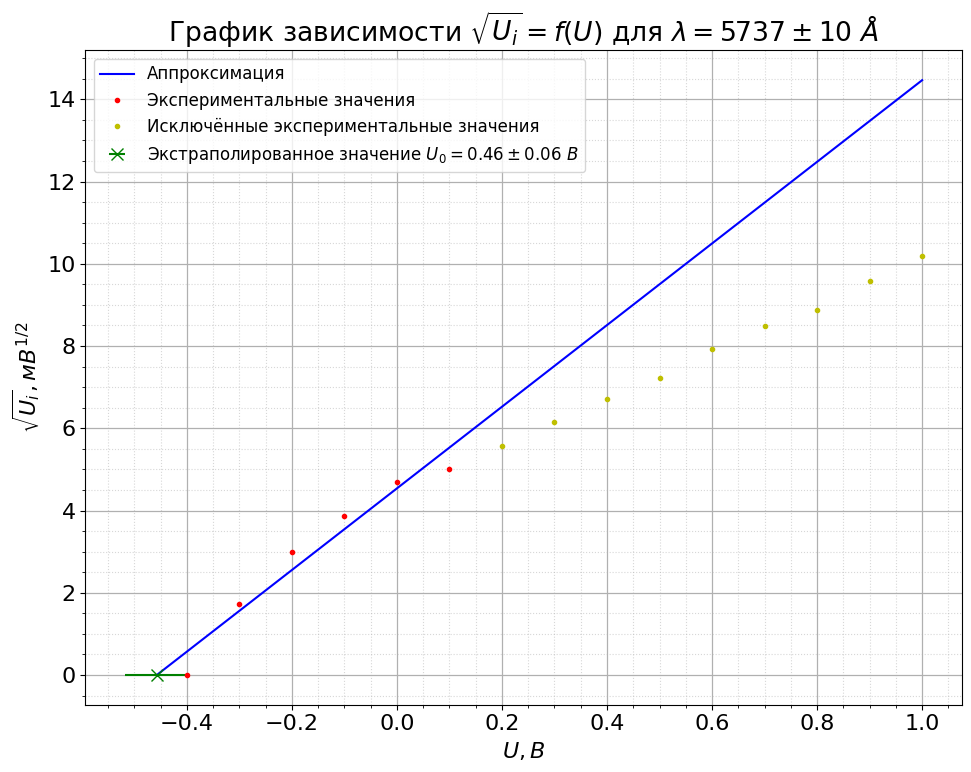



\begin{table}[!ht]
    \centering
    \begin{tabular}{|c|c|c|}
        \hline

        $U, В$ & $U_i, мВ$ & $\sqrt{U_i}, мВ^{1/2}$\\ \hline
        $1.0000$ & $104$ & $10.20 \pm 0.05$\\ \hline
        $0.9000$ & $92$ & $9.59 \pm 0.05$\\ \hline
        $0.8000$ & $79$ & $8.89 \pm 0.06$\\ \hline
        $0.7000$ & $72$ & $8.49 \pm 0.06$\\ \hline
        $0.6000$ & $63$ & $7.94 \pm 0.06$\\ \hline
        $0.5000$ & $52$ & $7.21 \pm 0.07$\\ \hline
        $0.4000$ & $45$ & $6.71 \pm 0.07$\\ \hline
        $0.3000$ & $38$ & $6.16 \pm 0.08$\\ \hline
        $0.2000$ & $31$ & $5.57 \pm 0.09$\\ \hline
        $0.1000$ & $25$ & $5.00 \pm 0.10$\\ \hline
        $0.0000$ & $22$ & $4.69 \pm 0.11$\\ \hline
        $-0.1000$ & $15$ & $3.87 \pm 0.13$\\ \hline
        $-0.2000$ & $9$ & $3.0 \pm 0.2$\\ \hline
        $-0.3000$ & $3$ & $1.7 \pm 0.3$\\ \hline
        $-0.4000$ & $0$ & $0.0 \pm 1.0$\\ \hline

    \end{tabular}
    \caption{Таблица измерений для $\lambda = $$5737 \pm 10$ \AA}
    \label{

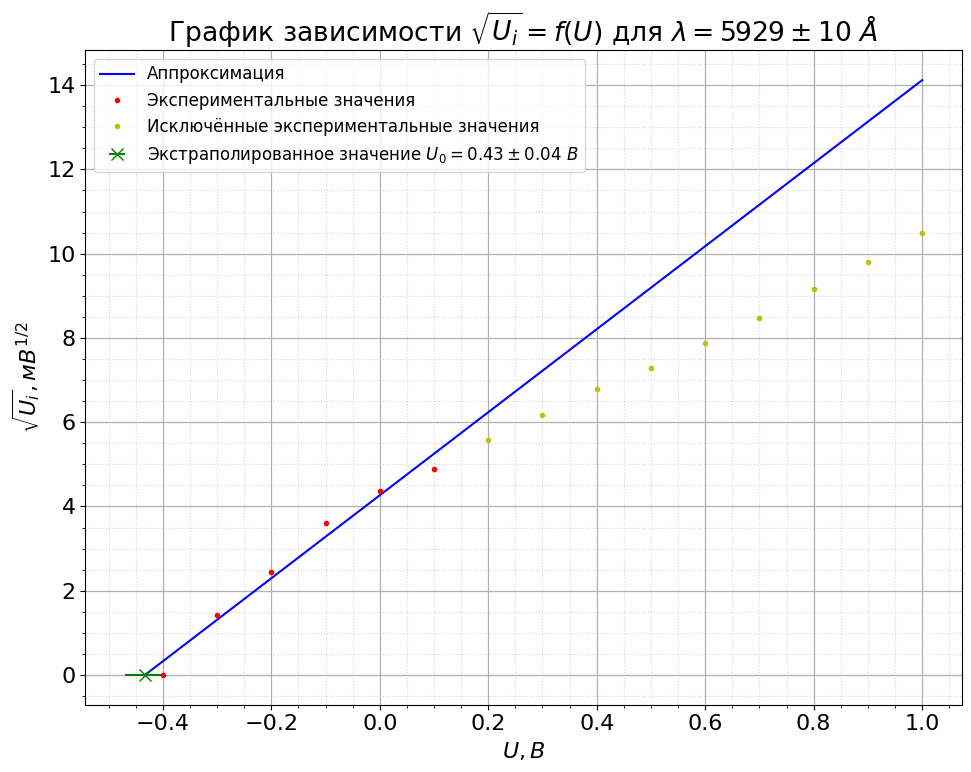



\begin{table}[!ht]
    \centering
    \begin{tabular}{|c|c|c|}
        \hline

        $U, В$ & $U_i, мВ$ & $\sqrt{U_i}, мВ^{1/2}$\\ \hline
        $1.0000$ & $110$ & $10.49 \pm 0.05$\\ \hline
        $0.9000$ & $96$ & $9.80 \pm 0.05$\\ \hline
        $0.8000$ & $84$ & $9.17 \pm 0.05$\\ \hline
        $0.7000$ & $72$ & $8.49 \pm 0.06$\\ \hline
        $0.6000$ & $62$ & $7.87 \pm 0.06$\\ \hline
        $0.5000$ & $53$ & $7.28 \pm 0.07$\\ \hline
        $0.4000$ & $46$ & $6.78 \pm 0.07$\\ \hline
        $0.3000$ & $38$ & $6.16 \pm 0.08$\\ \hline
        $0.2000$ & $31$ & $5.57 \pm 0.09$\\ \hline
        $0.1000$ & $24$ & $4.90 \pm 0.10$\\ \hline
        $0.0000$ & $19$ & $4.36 \pm 0.11$\\ \hline
        $-0.1000$ & $13$ & $3.6 \pm 0.1$\\ \hline
        $-0.2000$ & $6$ & $2.4 \pm 0.2$\\ \hline
        $-0.3000$ & $2$ & $1.4 \pm 0.4$\\ \hline
        $-0.4000$ & $0$ & $0.0 \pm 1.0$\\ \hline

    \end{tabular}
    \caption{Таблица измерений для $\lambda = $$5929 \pm 10$ \AA}
    \label{}


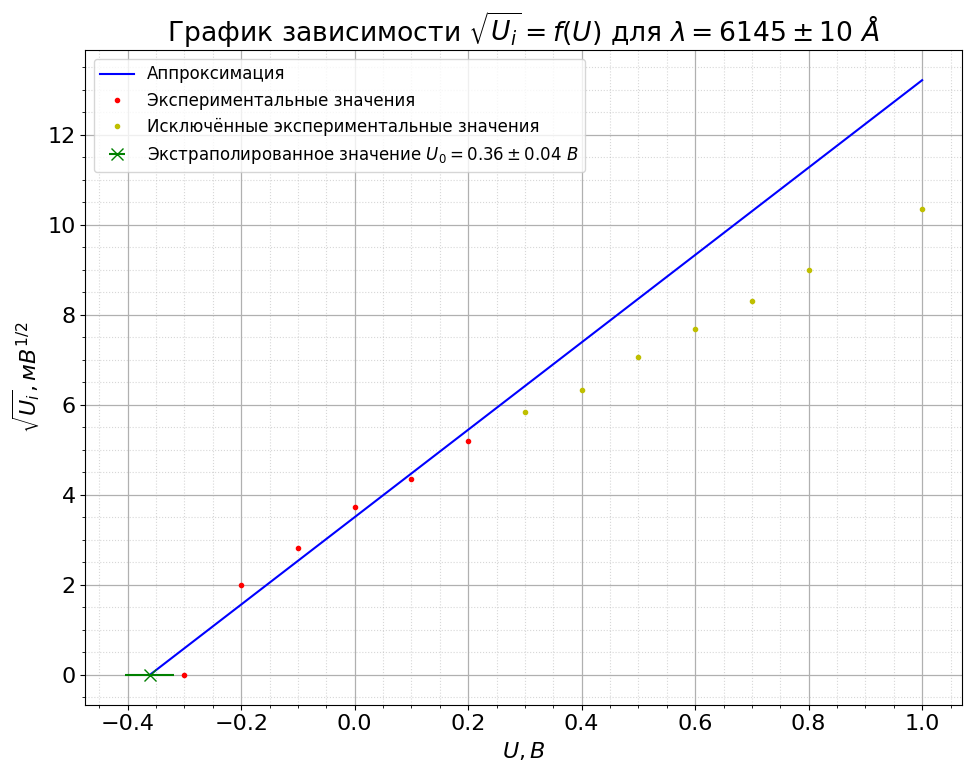



\begin{table}[!ht]
    \centering
    \begin{tabular}{|c|c|c|}
        \hline

        $U, В$ & $U_i, мВ$ & $\sqrt{U_i}, мВ^{1/2}$\\ \hline
        $1.0000$ & $107$ & $10.34 \pm 0.05$\\ \hline
        $0.8000$ & $81$ & $9.00 \pm 0.06$\\ \hline
        $0.7000$ & $69$ & $8.31 \pm 0.06$\\ \hline
        $0.6000$ & $59$ & $7.68 \pm 0.07$\\ \hline
        $0.5000$ & $50$ & $7.07 \pm 0.07$\\ \hline
        $0.4000$ & $40$ & $6.32 \pm 0.08$\\ \hline
        $0.3000$ & $34$ & $5.83 \pm 0.09$\\ \hline
        $0.2000$ & $27$ & $5.20 \pm 0.10$\\ \hline
        $0.1000$ & $19$ & $4.36 \pm 0.11$\\ \hline
        $0.0000$ & $14$ & $3.7 \pm 0.1$\\ \hline
        $-0.1000$ & $8$ & $2.8 \pm 0.2$\\ \hline
        $-0.2000$ & $4$ & $2.0 \pm 0.2$\\ \hline
        $-0.3000$ & $0$ & $0.0 \pm 1.0$\\ \hline

    \end{tabular}
    \caption{Таблица измерений для $\lambda = $$6145 \pm 10$ \AA}
    \label{}
\end{table}



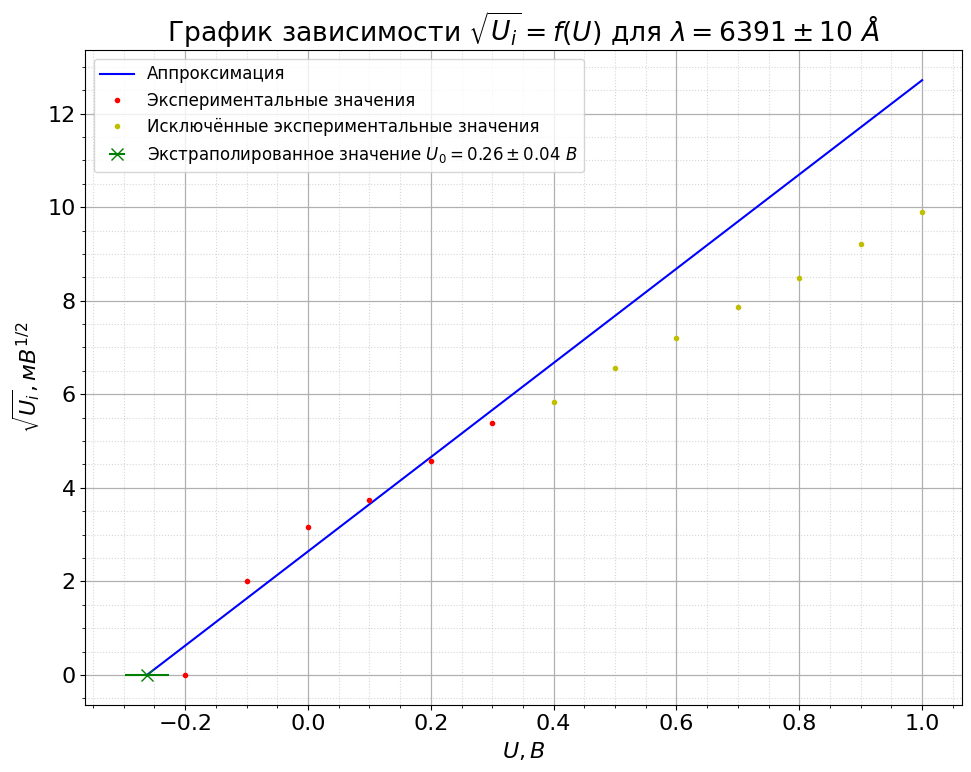



\begin{table}[!ht]
    \centering
    \begin{tabular}{|c|c|c|}
        \hline

        $U, В$ & $U_i, мВ$ & $\sqrt{U_i}, мВ^{1/2}$\\ \hline
        $1.0000$ & $98$ & $9.90 \pm 0.05$\\ \hline
        $0.9000$ & $85$ & $9.22 \pm 0.05$\\ \hline
        $0.8000$ & $72$ & $8.49 \pm 0.06$\\ \hline
        $0.7000$ & $62$ & $7.87 \pm 0.06$\\ \hline
        $0.6000$ & $52$ & $7.21 \pm 0.07$\\ \hline
        $0.5000$ & $43$ & $6.56 \pm 0.08$\\ \hline
        $0.4000$ & $34$ & $5.83 \pm 0.09$\\ \hline
        $0.3000$ & $29$ & $5.39 \pm 0.09$\\ \hline
        $0.2000$ & $21$ & $4.58 \pm 0.11$\\ \hline
        $0.1000$ & $14$ & $3.7 \pm 0.1$\\ \hline
        $0.0000$ & $10$ & $3.2 \pm 0.2$\\ \hline
        $-0.1000$ & $4$ & $2.0 \pm 0.2$\\ \hline
        $-0.2000$ & $0$ & $0.0 \pm 1.0$\\ \hline

    \end{tabular}
    \caption{Таблица измерений для $\lambda = $$6391 \pm 10$ \AA}
    \label{}
\end{table}



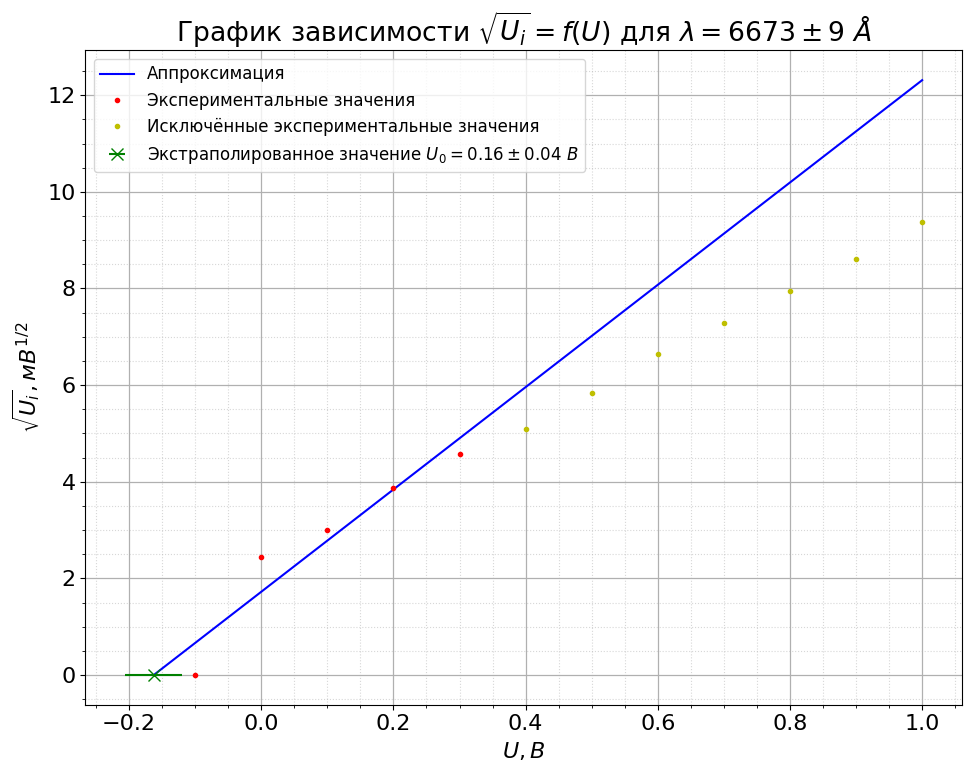



\begin{table}[!ht]
    \centering
    \begin{tabular}{|c|c|c|}
        \hline

        $U, В$ & $U_i, мВ$ & $\sqrt{U_i}, мВ^{1/2}$\\ \hline
        $1.0000$ & $88$ & $9.38 \pm 0.05$\\ \hline
        $0.9000$ & $74$ & $8.60 \pm 0.06$\\ \hline
        $0.8000$ & $63$ & $7.94 \pm 0.06$\\ \hline
        $0.7000$ & $53$ & $7.28 \pm 0.07$\\ \hline
        $0.6000$ & $44$ & $6.63 \pm 0.08$\\ \hline
        $0.5000$ & $34$ & $5.83 \pm 0.09$\\ \hline
        $0.4000$ & $26$ & $5.099 \pm 0.098$\\ \hline
        $0.3000$ & $21$ & $4.58 \pm 0.11$\\ \hline
        $0.2000$ & $15$ & $3.87 \pm 0.13$\\ \hline
        $0.1000$ & $9$ & $3.0 \pm 0.2$\\ \hline
        $0.0000$ & $6$ & $2.4 \pm 0.2$\\ \hline
        $-0.1000$ & $0$ & $0.0 \pm 1.0$\\ \hline

    \end{tabular}
    \caption{Таблица измерений для $\lambda = $$6673 \pm 9$ \AA}
    \label{}
\end{table}



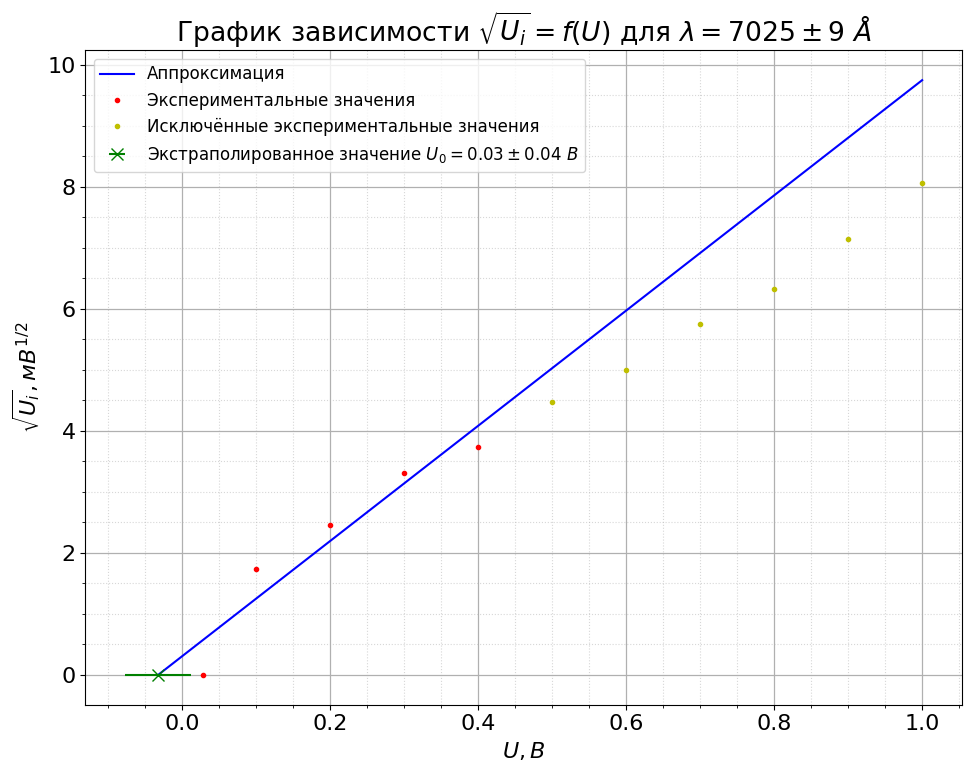



\begin{table}[!ht]
    \centering
    \begin{tabular}{|c|c|c|}
        \hline

        $U, В$ & $U_i, мВ$ & $\sqrt{U_i}, мВ^{1/2}$\\ \hline
        $1.0000$ & $65$ & $8.06 \pm 0.06$\\ \hline
        $0.9000$ & $51$ & $7.14 \pm 0.07$\\ \hline
        $0.8000$ & $40$ & $6.32 \pm 0.08$\\ \hline
        $0.7000$ & $33$ & $5.74 \pm 0.09$\\ \hline
        $0.6000$ & $25$ & $5.00 \pm 0.10$\\ \hline
        $0.5000$ & $20$ & $4.47 \pm 0.11$\\ \hline
        $0.4000$ & $14$ & $3.7 \pm 0.1$\\ \hline
        $0.3000$ & $11$ & $3.3 \pm 0.2$\\ \hline
        $0.2000$ & $6$ & $2.4 \pm 0.2$\\ \hline
        $0.1000$ & $3$ & $1.7 \pm 0.3$\\ \hline
        $0.0280$ & $0$ & $0.0 \pm 1.0$\\ \hline

    \end{tabular}
    \caption{Таблица измерений для $\lambda = $$7025 \pm 9$ \AA}
    \label{}
\end{table}



TypeError: bad operand type for abs(): 'list'

In [10]:
def proc(theta, excl):
    file = read_ods(f"data/fine_{theta}.ods").to_numpy()
    lambd = cal_func((theta, 2))

    U   = [(i[0], 0.0001) for i in file]
    U_i = [(i[1], 1) for i in file]

    x = [i[0] for i in U]
    y = [np.sqrt(i[0]) for i in U_i]
    k, b = mnk(x[excl:], y[excl:])

    U_0 = (b[0] / k[0], np.sqrt((b[1] / k[0])**2 + (b[0] * k[1] / k[0]**2)**2))

    mpl.rcParams['font.size'] = 16
    plt.figure(figsize = (10,8), facecolor = "white")

    plt.title(r"График зависимости $\sqrt{U_i} = f(U)$ для $\lambda = $" + texAns(lambd) + r"$~\AA$")
    plt.xlabel(r"$U, В$")
    plt.ylabel(r"$\sqrt{U_i}, мВ^{1/2}$")

    plt.errorbar(x[excl:], y[excl:], fmt='.r', label = 'Экспериментальные значения')
    plt.errorbar(x[:excl], y[:excl], fmt='.y', label = 'Исключённые экспериментальные значения')

    x_lin = np.linspace(-U_0[0], max(x), 1000)
    plt.plot(x_lin, [i * k[0] + b[0] for i in x_lin], "b", label = "Аппроксимация")

    plt.errorbar(-U_0[0], 0, fmt="xg", xerr=U_0[1], markersize = 9, label = 'Экстраполированное значение $U_0 = $' + texAns(U_0) + r"$~В$")

    plt.grid(visible = True, which = 'major', axis = 'both', alpha = 1, linewidth = 0.9)
    plt.grid(visible = True, which = 'minor', axis = 'both', alpha = 0.5, linestyle = ':')

    plt.minorticks_on()
    plt.tight_layout()
    plt.legend(loc = "best", fontsize = 12)

    plt.savefig(f"img/sqrt_plot_{theta}.png")
    plt.show()

    table = [[r"$U, В$", r"$U_i, мВ$", r"$\sqrt{U_i}, мВ^{1/2}$"]]
    caption = r"Таблица измерений для $\lambda = $" + texAns(lambd) + r" \AA"
    for i in range(len(U)):
        if U_i[i][0] == 0:
            U_i_sqrt = (0, 1)
        else:
            U_i_sqrt = (np.sqrt(U_i[i][0]), U_i[i][1] / 2 / np.sqrt(U_i[i][0]))
        table.append(["$%.4f$" % U[i][0], "$%d$" % U_i[i][0], texAns(U_i_sqrt)])

    texTable(table, caption)

    return U_0, lambd, (k, b)

thetas = list(range(2210, 2810+1, 100)) + [2918]
excl = [-6, -6, -6, -6, -6, -6, -5, -5]

U_0s    = []
lambdas = []
omegas  = []
k_b_s   = []
for i in range(len(thetas)):
    U_0, lambd, k_b = proc(thetas[i], excl[i])
    U_0s.append(U_0)
    lambdas.append(lambd)
    omegas.append((2*np.pi*3*10**18/lambd[0], 2*np.pi*3*10**18*lambd[1]/lambd[0]**2))
    k_b_s.append(k_b)

res_table = [[r"$\theta$", r"$\lambda,$ \AA", r"$\omega, 10^{15} рад/с$", r"$k, эрг*с$", r"$b, эВ$", r"$U_0, В$"]]
for i in range(len(U_0s)):
    res_table.append([texAns((thetas[i], 2)), texAns(lambdas[i]), texAns(tuple(i*10**-15 for i in omegas[i])), texAns(k_b_s[i][0]), texAns(k_b_s[i][1]), texAns(U_0s[i])])

texTable(res_table, "Таблица результатов запирающих потенциалов")

In [ ]:
k, b = make_mnk("img/U_omega.png", r"График зависимости $U_0(\omega)$", r"$\omega, рад/с$", r"$U_0, В$", [i[0] for i in omegas], [i[0] for i in U_0s], dx=[i[1] for i in omegas], dy=[i[1] for i in U_0s])

h_bar = k
print(r"$\hbar = $" + texAns(tuple(i*10**16 for i in h_bar)), r"$10^{-16}~эрг*с$")

W = countWithSigma(-b[0], [b])
print(r"$W$" + texAns(tuple(i for i in W)), r"$эВ$")

omega_red = (-b[0] / k[0], np.sqrt((b[1]/k[0])**2 + (b[0]*k[1]/k[0]**2)**2))
print(r"$\omega_{кр}$" + texAns(tuple(i*10**-15 for i in omega_red)), r"$10^{15}~рад/с$")

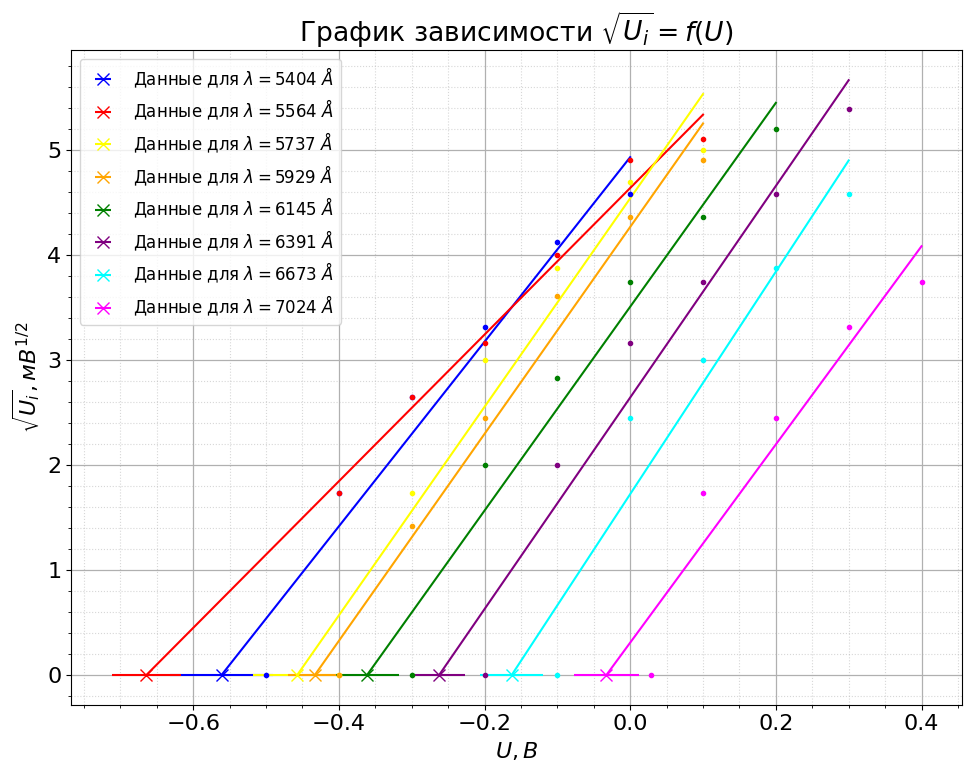

In [11]:
mpl.rcParams['font.size'] = 16
plt.figure(figsize = (10,8), facecolor = "white")

plt.title(r"График зависимости $\sqrt{U_i} = f(U)$")
plt.xlabel(r"$U, В$")
plt.ylabel(r"$\sqrt{U_i}, мВ^{1/2}$")

colors = ["blue", "red", "yellow", "orange", "green", "purple", "cyan", "magenta"]
for i, theta in enumerate(thetas):
    file = read_ods(f"data/fine_{theta}.ods").to_numpy()
    lambd = cal_func((theta, 2))

    U   = [(i[0], 0.0001) for i in file][excl[i]:]
    U_i = [(i[1], 1) for i in file][excl[i]:]

    x = [i[0] for i in U]
    y = [np.sqrt(i[0]) for i in U_i]
    k, b = mnk(x, y)

    U_0 = (b[0] / k[0], np.sqrt((b[1] / k[0])**2 + (b[0] * k[1] / k[0]**2)**2))

    plt.errorbar(x, y, fmt='.', color=colors[i])

    x_lin = np.linspace(-U_0[0], max(x), 1000)
    plt.plot(x_lin, [i * k[0] + b[0] for i in x_lin], color=colors[i])

    plt.errorbar(-U_0[0], 0, fmt="x", xerr=U_0[1], markersize = 9, color=colors[i], label = r"Данные для $\lambda = " + str(int(lambd[0])) + r"~\AA$")

plt.grid(visible = True, which = 'major', axis = 'both', alpha = 1, linewidth = 0.9)
plt.grid(visible = True, which = 'minor', axis = 'both', alpha = 0.5, linestyle = ':')

plt.minorticks_on()
plt.tight_layout()
plt.legend(loc = "best", fontsize = 12)

plt.savefig(f"img/sqrt_plot.png")
plt.show()